In this study, my objective is to leverage a supervised machine learning algorithm to predict the future categorization of customers. This categorization is based on the eight distinct customer segments identified through our preceding cluster analysis.

In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn import metrics

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, make_scorer,
    accuracy_score, roc_auc_score, recall_score, balanced_accuracy_score,
    precision_score, f1_score, RocCurveDisplay)

In [43]:
# Import Data
customer = pd.read_csv('../data/customer_seg.csv')

customer.rename(columns = {'cluster_sec': 'class'}, inplace = True)

customer.head()

,recency,frequency_item,frequency_order,monetary,class
0,325,1,1,0.00,1
1,2,103,7,4310.00,0
2,75,22,4,1797.24,3
3,18,73,1,1757.55,3
4,310,17,1,334.40,1


In [44]:
# Baseline
customer['class'].value_counts(normalize = True)

3    0.490436
1    0.233925
0    0.208343
6    0.047246
7    0.016363
5    0.002305
4    0.000691
2    0.000691
Name: class, dtype: float64

### Split Data

In [45]:
X = customer.drop(columns = ['class'])
y = customer['class']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

### Evaluation Function

In [47]:
# Create evaluation function
def evaluation(X_test, y_test, preds, model):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    
    b_acc = balanced_accuracy_score(y_test, preds)
    # Use weighted to handle unbalanced data
    recall = recall_score(y_test, preds, average = 'weighted')
    prec = precision_score(y_test, preds, average = 'weighted')
    f1 = f1_score(y_test, preds, average = 'weighted')

    print(f'balanced_accuracy: {b_acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

    return {
        'balanced_accuracy': b_acc,
        'recall': recall,
        'precision': prec,
        'f1_score': f1
    }

scores = []

### Logistic Regression

In [48]:
pipe_lgr = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state = 42))
])

In [49]:
lg_params = {
    'model__penalty': ['l2'],
    'model__max_iter': [1000]
}

In [50]:
gs_lg = GridSearchCV(pipe_lgr, param_grid = lg_params, cv = 5)

In [51]:
gs_lg.fit(X_train, y_train)

/Users/ranma/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             param_grid={'model__max_iter': [1000], 'model__penalty': ['l2']})

balanced_accuracy: 0.9198763843293596
recall: 0.9870967741935484
precision: 0.9871122403646938
f1 score: 0.9869239310736021


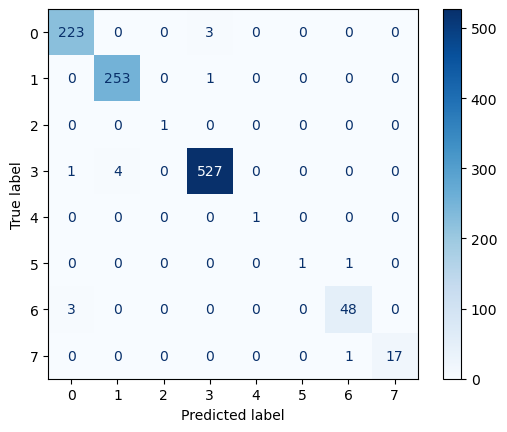

In [52]:
scores.append(evaluation(X_test, y_test, gs_lg.predict(X_test), gs_lg))